In [515]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import pylab
import numpy as np
from scipy.interpolate import *
from matplotlib.pyplot import *

def MODIS_and_fluxsite_data(reflectance_filename, flux_filename):
    print (reflectance_filename, flux_filename)
    
    #import MODIS reflectance data into jupyter notebook
    ref_data = pd.read_csv(reflectance_filename, na_values = ['NA'])
    #convert Date from a normal string, into a datetime data file
    ref_data['Date'] = pd.to_datetime(ref_data['Date'], format='%m/%d/%y')
    #set Date as the index or x component for all graphs for the reflectance data
    ref_data = ref_data.set_index(['Date'])
    
    #import the eddy flux site information into jupyter notebook
    fluxeddy = pd.read_csv(flux_filename)
    #change the time field to a new column named 'date' and convert it to datetime format
    fluxeddy['date']=pd.to_datetime(fluxeddy['time'],format='%Y%j')
    fluxeddy.index = fluxeddy['date']
    #set index as or x composnet for all graphs to be the new time/date format
    fluxeddy = fluxeddy.ix[:,'time':]
    
    #Create a function to graph the data
    def myplot(x,y,style,title,xlabel,ylabel,figsize=(35,20)):
        fig, axes = plt.subplots()
        ax = y.plot(ax=axes, figsize=figsize, title=title, style=style)
        plt.xticks(rotation=90)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        #set x-axis major Dateformatter
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.xaxis_date()
        #set grid lines
        ax = plt.gca().grid(True)
        
    #plot Vegetation indices for MODIS data
    ref_x = ref_data.index
    ref_y = ref_data[['GF_NDVI','GF_EVI','GF_LSWI']]
        
    myplot(ref_x,ref_y,'',"Vegetation Indices for MODIS","Date","Vegetation Indices",figsize=(25,15))   
    
    #plot Vegesation indices for Eddy Flux Sites
    flux_x = fluxeddy.index
    flux_y = fluxeddy[['P_F','Ta_mean (Deg C)']]
    
    myplot(flux_x,flux_y,'',"Climate characteristcs","Date","Precipitation in mm/day and Temperature in Degrees C",figsize=(25,15))
    
    #create a subset of data for just the Vegetation Indices and the Mean Daily Temperature Ta_mean (Deg_C)
    ref_subset = ref_data[['GF_NDVI','GF_EVI','GF_LSWI']]
    
    #merge the flux site data to the MODIS reflectance data for all sites
    mdf = ref_subset.merge(fluxeddy,left_index=True,right_index=True)
    
    #####################################
    # Graph of NDVI and EVI in relation to daily average temperature
    fig, ax1 = plt.subplots()
    t = mdf.index
    s1 = mdf[["GF_NDVI","GF_EVI"]]
    ax1.plot(t,s1)
    ax1.set_ylabel('Vegetation Indices: NDVI and EVI')
    ax1.tick_params('y',colors = 'g')
    
    ax2 = ax1.twinx()
    s2 = mdf[['Ta_mean (Deg C)']]
    ax2.plot(t, s2, 'r')
    ax2.set_ylabel('Average daily Temperature')
    ax2.tick_params('y', colors = 'r')
    
    plt.title("Changes in NDVI and EVI with Temperature")
    ax1.grid(True)
    fig.set_size_inches(10,6)
    fig = plt.gcf()
    
    ##############################################
    # Graph incoming solar in regards to temperature
   
    fig, ax1 = plt.subplots()
    t = mdf.index
    s1 = mdf[["SW_IN_F"]]
    ax1.plot(t,s1)
    ax1.set_ylabel('Incoming Solar Radiation')
    ax1.tick_params('y',colors = 'r')
    
    ax2 = ax1.twinx()
    s2 = mdf[['Ta_mean (Deg C)']]
    ax2.plot(t, s2, 'r')
    ax2.set_ylabel('Average daily Temperature')
    ax2.tick_params('y', colors = 'r')
    
    plt.title("Incoming Solar Radiation effect on Temperature")
    ax1.grid(True)
    fig.set_size_inches(10,6)
    fig = plt.gcf()
    #####################################
    #Graph GPP and Vegetation Indices of the flux site
       
    fig, ax1 = plt.subplots()
    t = mdf.index
    s1 = mdf[["GF_NDVI",'GF_EVI']]
    ax1.plot(t,s1,'g')
    ax1.set_ylabel('NDVI and EVI')
    ax1.tick_params('y',colors = 'g')
    
    ax2 = ax1.twinx()
    s2 = mdf[['GPP_NT_VUT_REF']]
    ax2.plot(t, s2, 'b')
    ax2.set_ylabel('GPP in g C m-2 day-1')
    ax2.tick_params('y', colors = 'b')
    
    plt.title("GPP and Vegetation Indices to indicate growing season")
    ax1.grid(True)
    fig.set_size_inches(10,6)
    fig = plt.gcf()
    
    #####################################
    #graph the y-axis GF_NDVI and GF_EVI with the Date acting as the x-axis.
    plt.figure(figsize=(30,15))
    plt.xticks(rotation=90)
    plt.title("NDVI and EVI over time")
    plt.xlabel("Date")
    plt.ylabel("NDVI and EVI")
    plt.plot(mdf.index, mdf['GF_NDVI'])
    plt.plot(mdf.index, mdf['GF_EVI'])
    plt.plot(mdf.index,mdf['GF_LSWI'])
    
    #####################################
    
    flux_x = fluxeddy.index
    flux_y = fluxeddy[['P_F','Ta_mean (Deg C)']]
    
    Cflux = mdf.index
    GPPflux = mdf[['RECO_NT_VUT_REF','GPP_NT_VUT_REF']]
    
    myplot(Cflux,GPPflux,'',"Climate characteristcs","Date","Precipitation in mm/day and Temperature in Degrees C",figsize=(25,15))
    
    #####################################
    
    import numpy as np
    color = ['b','c','y','m','r']

    fig, ax =plt.subplots()
    ax.scatter(mdf.GF_NDVI, mdf.GPP_NT_VUT_REF)
    plt.title("GPP and NDVI")
    plt.xlabel("Vegetation Indices")
    plt.ylabel("GPP in g C m-2 day-1")
    plt.plot(np.unique(mdf.GF_NDVI), np.poly1d(np.polyfit(mdf.GF_NDVI, mdf.GPP_NT_VUT_REF, 1))(np.unique(mdf.GF_NDVI)))
    
    fig, ax =plt.subplots()
    ax.scatter(mdf.GF_EVI, mdf.GPP_NT_VUT_REF)
    plt.title("GPP and EVI")
    plt.xlabel("Vegetation Indices")
    plt.ylabel("GPP in g C m-2 day-1")
    plt.plot(np.unique(mdf.GF_EVI), np.poly1d(np.polyfit(mdf.GF_EVI, mdf.GPP_NT_VUT_REF, 1))(np.unique(mdf.GF_EVI)))

PlainsControlSite-mod09a1-2000-2015.csv US-ARc.csv


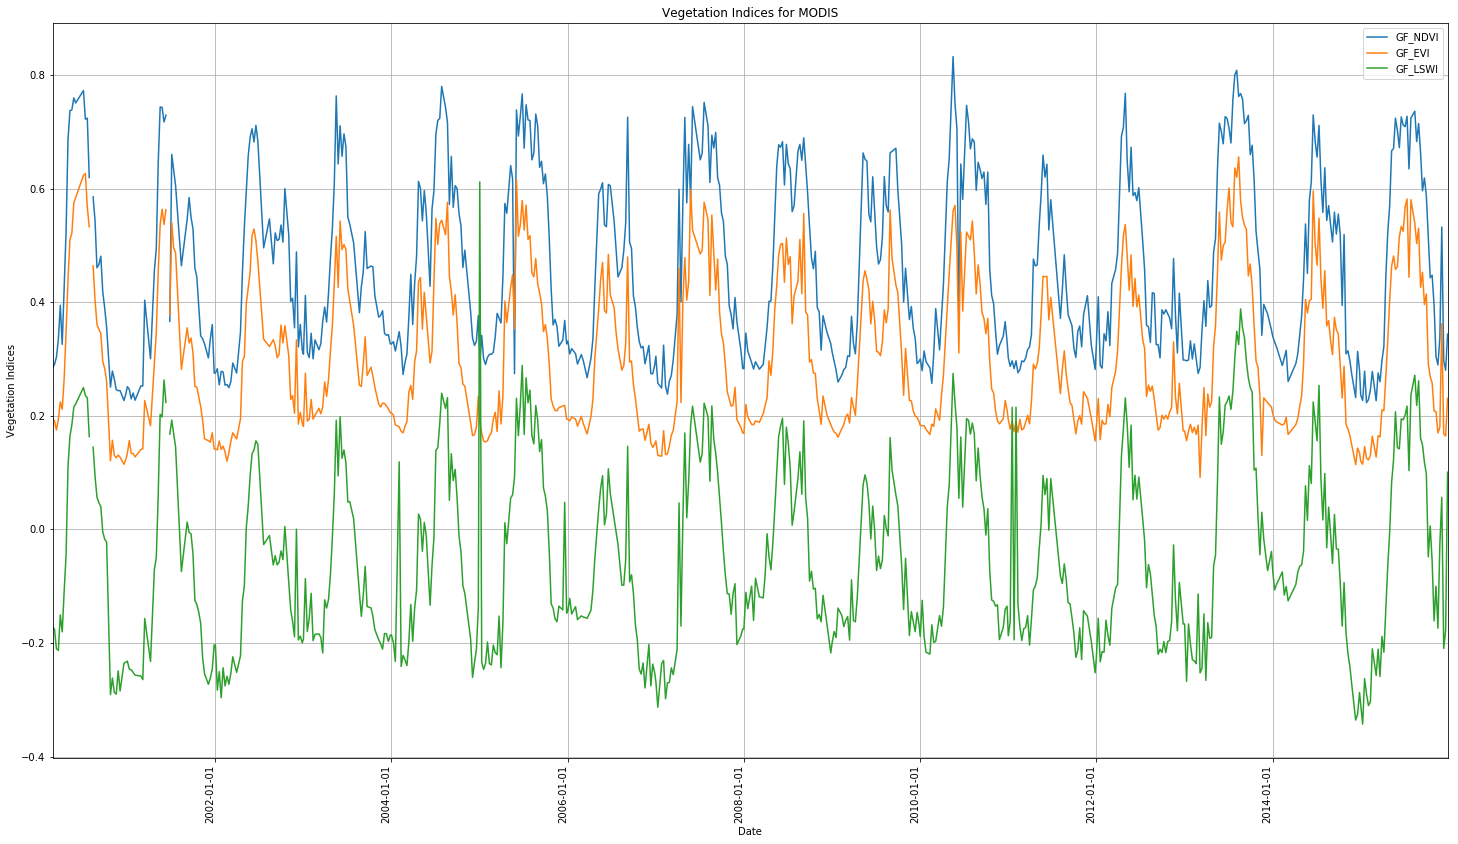

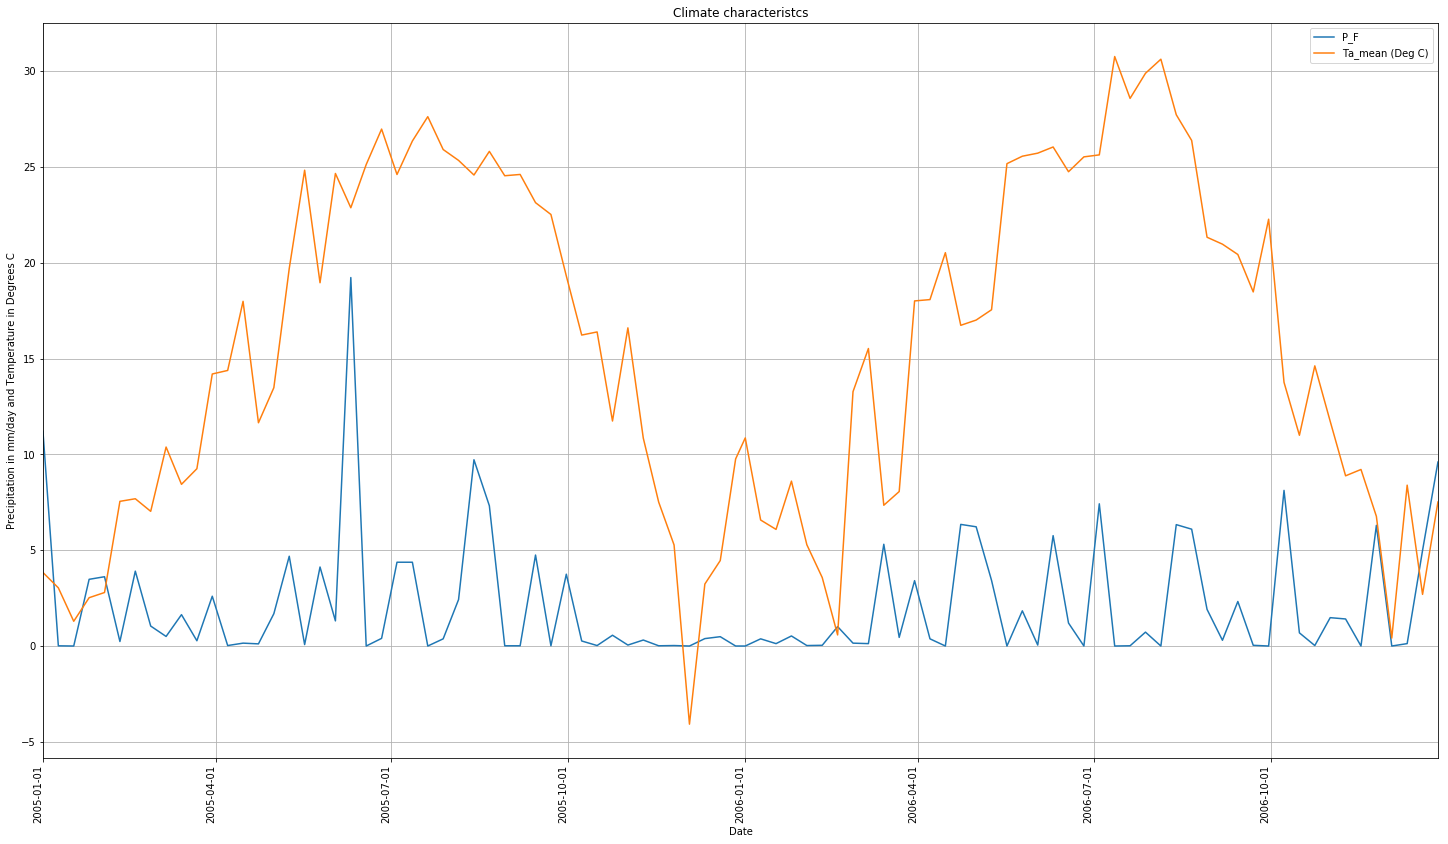

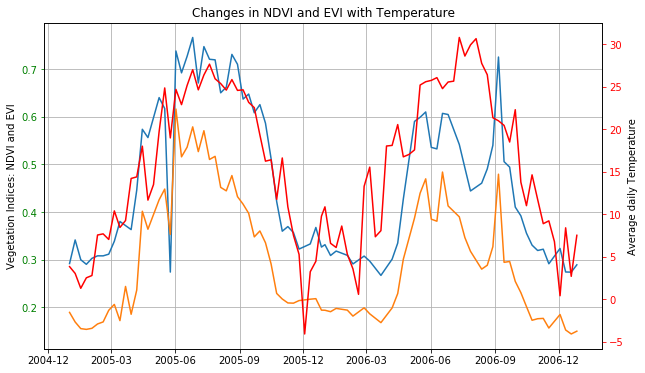

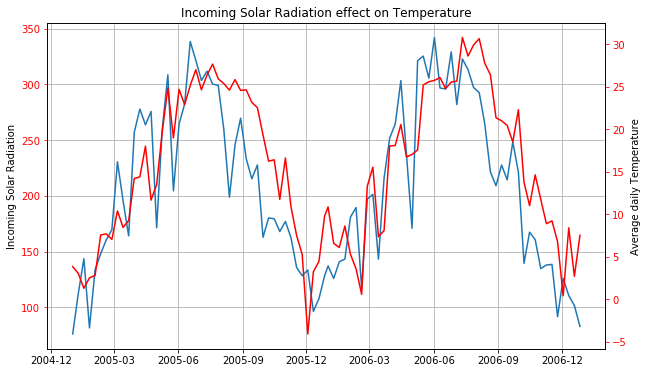

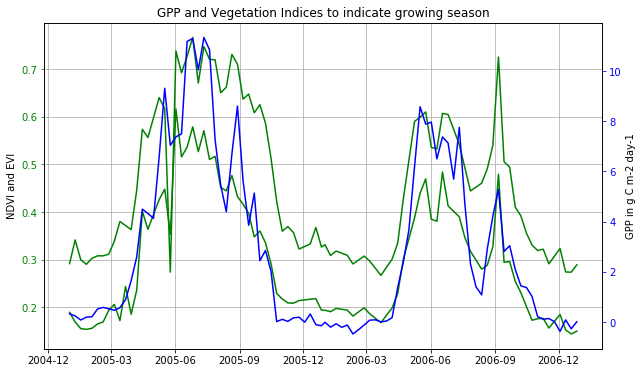

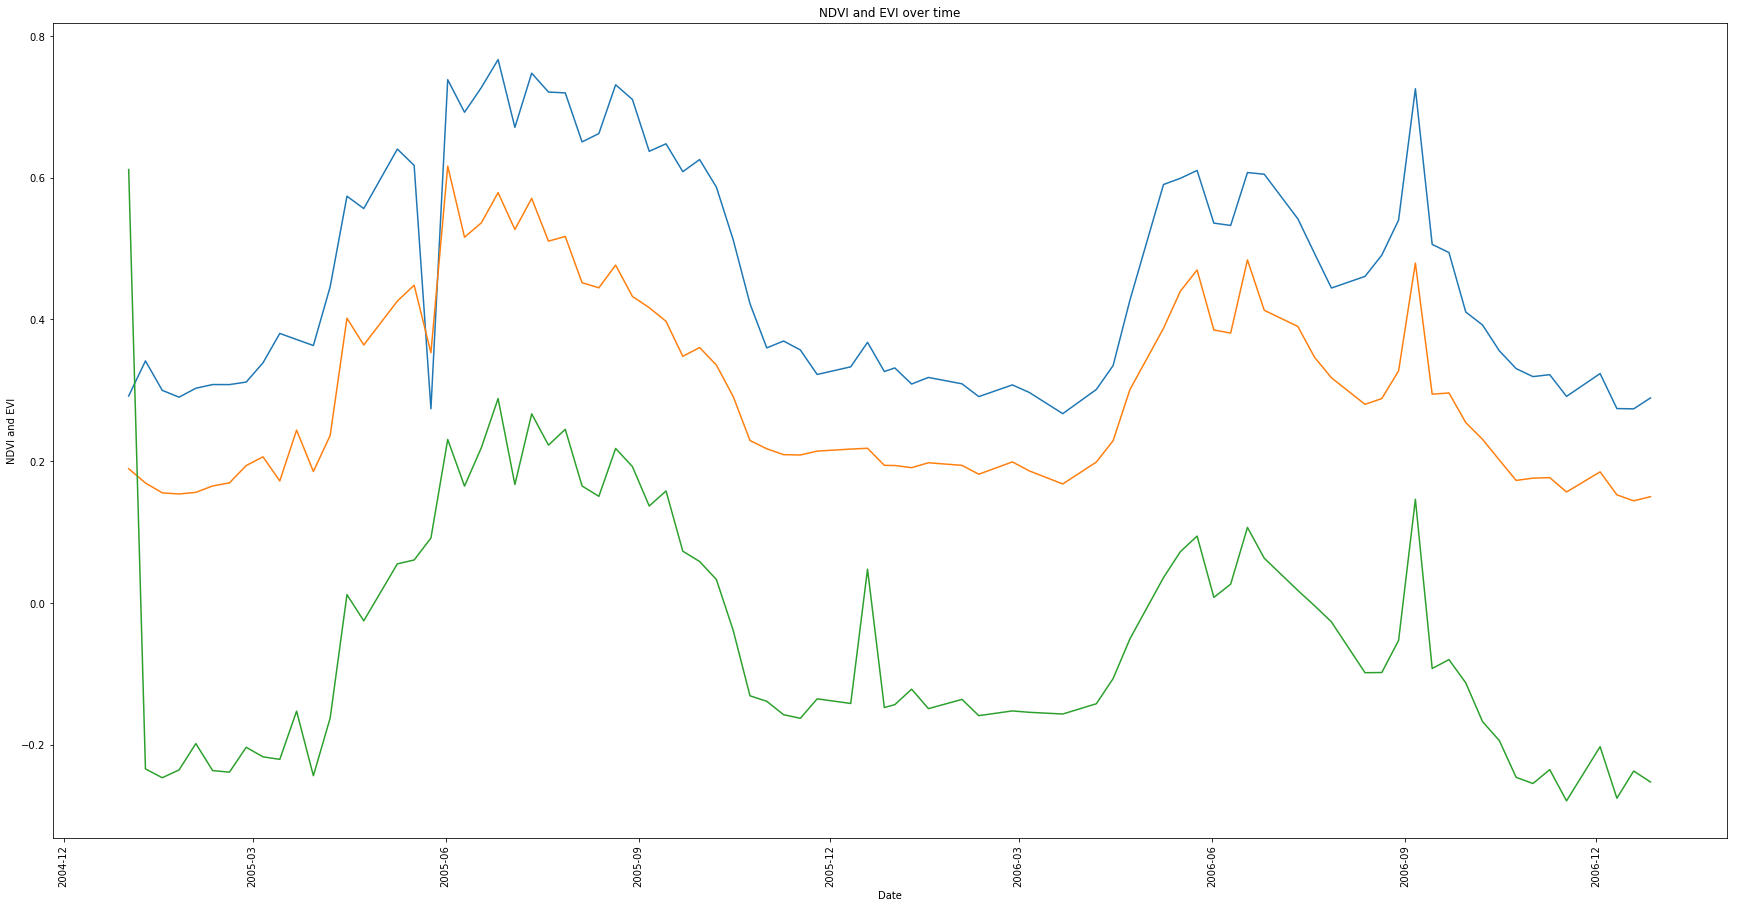

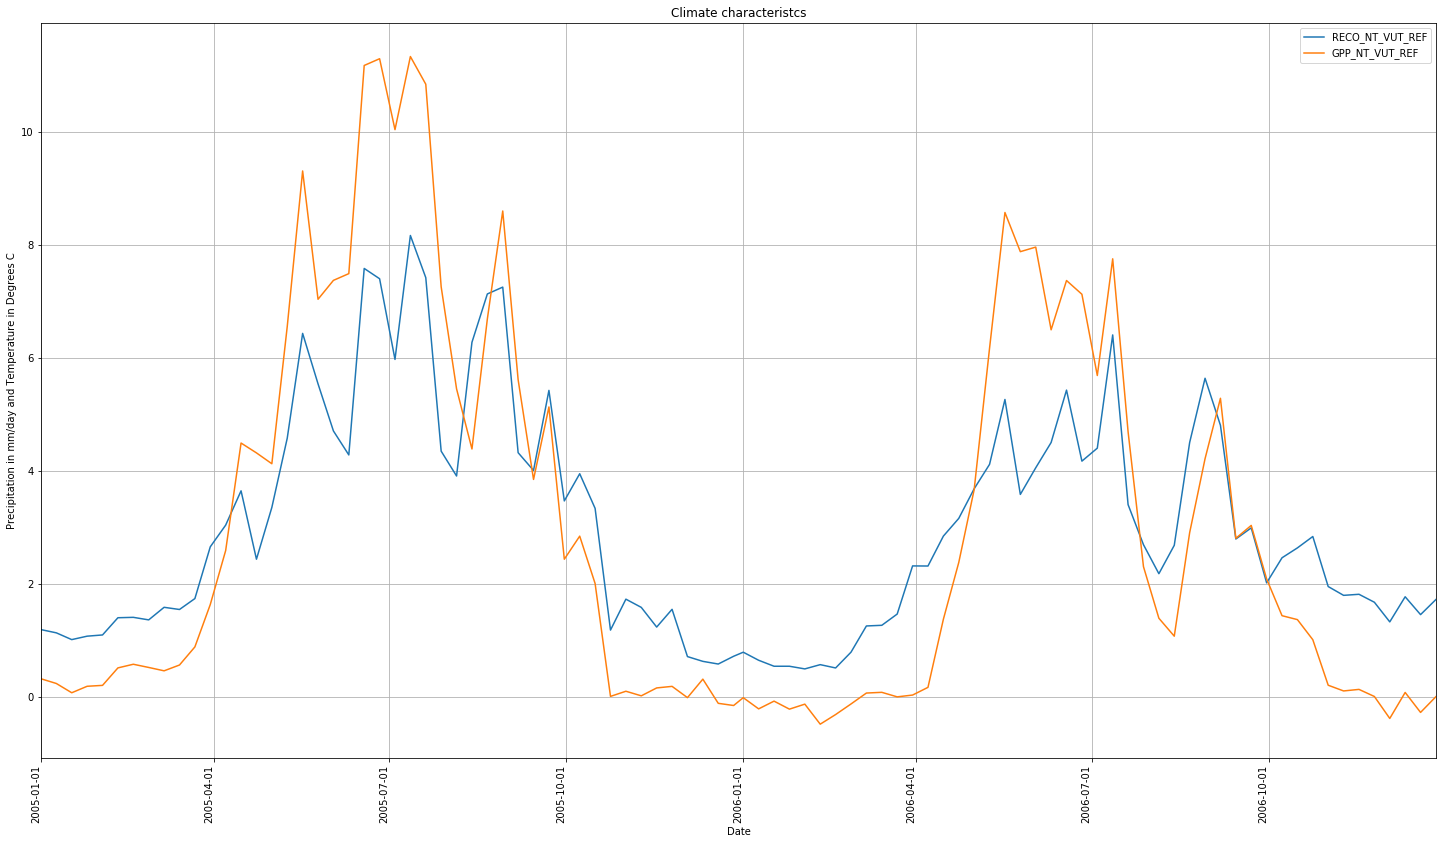

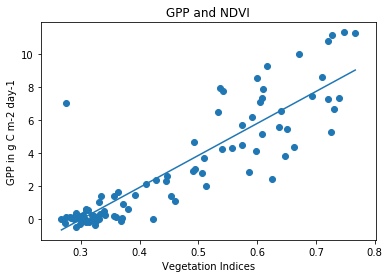

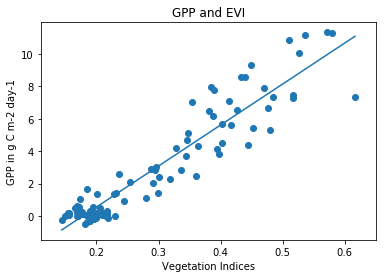

In [526]:
MODIS_and_fluxsite_data('PlainsControlSite-mod09a1-2000-2015.csv','US-ARc.csv')

In [ ]:
    #Create a chart with multiple y axeses for NDVI affected by daily mean temperature
    plt.figsize=(35,20)
    fig, ax1 = plt.subplots()
    t = mdf.index
    s1 = mdf[['GF_NDVI','GF_EVI']]
    ax1.plot(t,s1)
    ax1.set_xlabel('Date')
    # Make the y-axis label, ticks and label match the line color
    
    ax2 = ax1.twinx()
    s2 = mdf[['Ta_mean (Deg C)']]
    ax2.plot(t, s2)
    ax2.set_ylabel('Temperature in Degrees C')
    #set grid lines
    ax = plt.gca().grid(True)
    fig = plt.gcf()
    
    #plot Vegetation Indices in relation to temperature
    flux_mergx = mdf.index
    flux_y_vi = mdf[['GF_NDVI','GF_EVI']]
    flux_y_temp = mdf["Ta_mean (Deg C)"]
    
    myplotys(flux_mergx,flux_y_vi,flux_y_temp,'',"Indices as Temp. varies","Date","Vegetation Indices and Temperature in Degrees C")
    

In [ ]:
    #Create a function make graphs that require two y-axes
    def myplotys(ax1,ax2,style,title,xlabel,rylabel,lylabel,figsize=(30,15)):
        fig, ax = plt.subplots()
        ax1=y.plot(ax=axes,figsize=figsize,title=title,style=style)
        ax2=y2.plot(ax=axes,figsize=figsize,title=title,style=style)
        
        t = mdf.index
        s1 = mdf[['GF_NDVI','GF_EVI']]
        y.plot(t,s1)
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Normalized Difference Vegetation Index(NDVI)')
        
        y2 = ax1.twinx()
        s2 = mdf[['Ta_mean (Deg C)']]
        y2.plot(t,s2)
        y2.set_ylabel('Temperature in Degrees C')
        # set grid lines
        ax = plt.gca().grid(True)
    
    myplotys(ax1,ax2,'','Title','Date','Y labels')

In [ ]:
#Create a function make graphs that require two y-axes
    def myplotys(x,y1,y2,style,title,xlabel,rylabel,lylabel,figsize=(30,15)):
        fig, ax = plt.subplots()
        
    y1=mdf[['GF_NDVI','GF_EVI']]
    y2=mdf[['Ta_mean (Deg C)']]
    mdf["Date"]= mdf.index
    myplotys(mdf.Date,y1,y2,'','Vegetation Indices','Date','NDVI and EVI','Temperature in Degree C')
    